In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Imporating libraries:
# Importing libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile

In [3]:
# Opening the file
import zipfile

zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Assignment/Fake_News.zip')
fake_df = pd.read_csv(zf.open('Fake.csv'))
true_df = pd.read_csv(zf.open('True.csv'))

## Data exploration


In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


Combining the datasets fake and true articles, and creating label columns 'fake' and 'true'.

In [4]:
# Verify column names
fake_df_cols = fake_df.columns
true_df_cols = true_df.columns

# Iterate through list of column names to ensure they match
for (j,k) in enumerate(zip(fake_df_cols, true_df_cols)):
    # Print
    print(j,k)

0 ('title', 'title')
1 ('text', 'text')
2 ('subject', 'subject')
3 ('date', 'date')


In [4]:
# Add class columns
fake_df['class'] = '0'
true_df['class'] = '1'

## Observe from word cloud the most common word from fake and true news

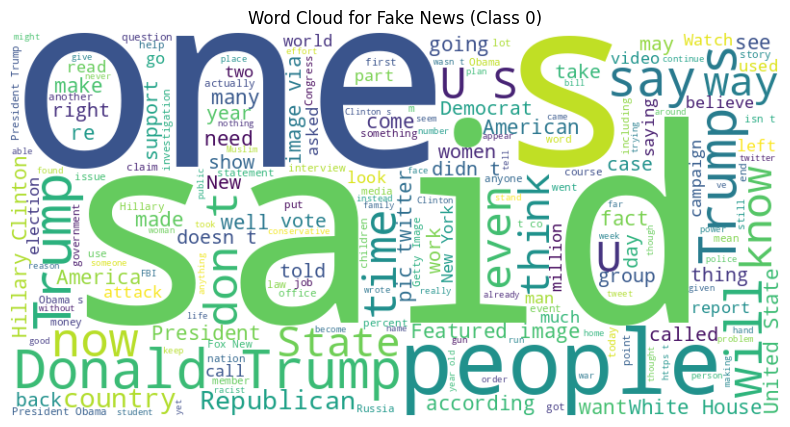

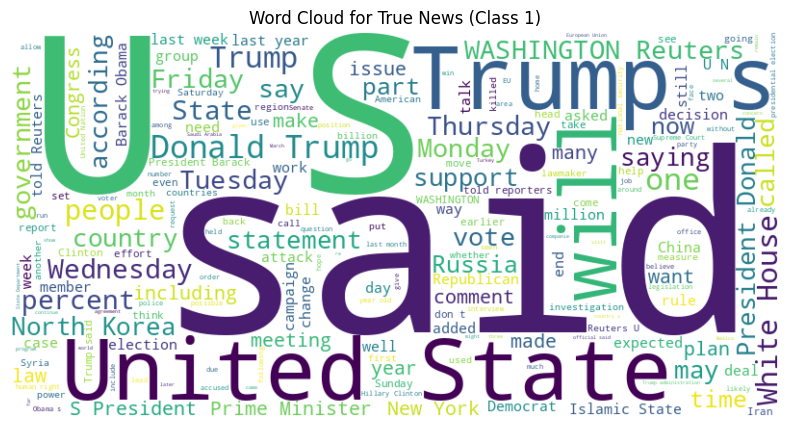

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Function to generate and display word clouds
def generate_word_cloud(data_frame, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_frame['text']))

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate and display word clouds for both classes
generate_word_cloud(fake_df, "Word Cloud for Fake News (Class 0)")
generate_word_cloud(true_df, "Word Cloud for True News (Class 1)")

### The word "said" is the most frequently occurring word in both datasets. In the fake news dataset, "said" is frequently followed by words such as "one," "people," and "Donald Trump." Conversely, in the true news dataset, "said" is often followed by terms like "United States," "U," "S," and "Trump."

In [5]:
# Combine the data sets
df = pd.concat([fake_df, true_df])

# View
print(f'Combined: {df.shape} | Fake: {fake_df.shape} | True: {true_df.shape}')

Combined: (44898, 5) | Fake: (23481, 5) | True: (21417, 5)


In [12]:
df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# Data Cleaning

In [6]:
# Dropping unrelevant columns 'date', 'title' and 'subject':
df.drop(['date', 'subject', 'title'], axis=1, inplace=True)

In [7]:
df.describe(include='all')

,text,class
count,44898,44898
unique,38646,2
top,,0
freq,627,23481


There is 38646 unique values from 44898 records.

In [7]:
# Removing duplicates values

df.drop_duplicates(subset=None, keep='first', inplace=True)
df.reset_index(inplace=True, drop=True)

df.describe(include='all')

,text,class
count,38647,38647
unique,38646,2
top,,1
freq,2,21192


In [16]:
df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


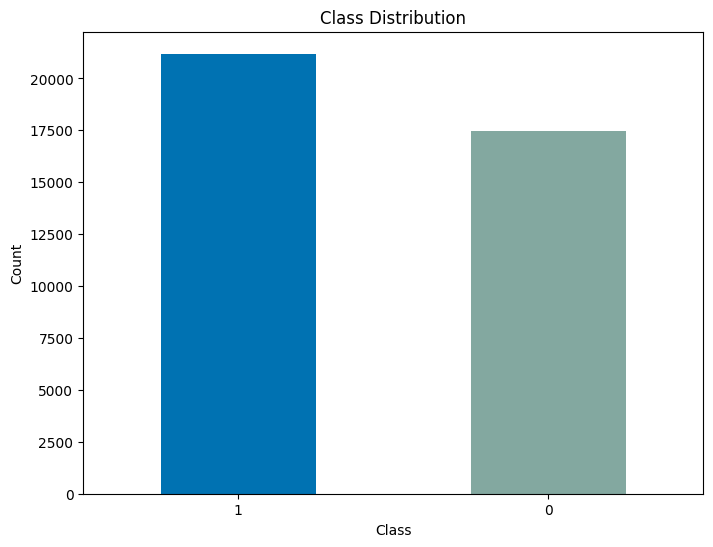

1: 54.83%
0: 45.17%


In [9]:
# Class distribution:
plt.figure(figsize=(8, 6))
class_distribution = df['class'].value_counts()
class_distribution.plot(kind='bar', color=['#0072B2', '#83A8A0'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0, label=['Fake', 'True'])
plt.show()

# Print the class distribution as percentages
total_samples = len(df)
for label, count in class_distribution.items():
    percentage = (count / total_samples) * 100
    print(f'{label}: {percentage:.2f}%')

### The difference in distribution between the classes is less than 10%, which falls below the threshold for model application.

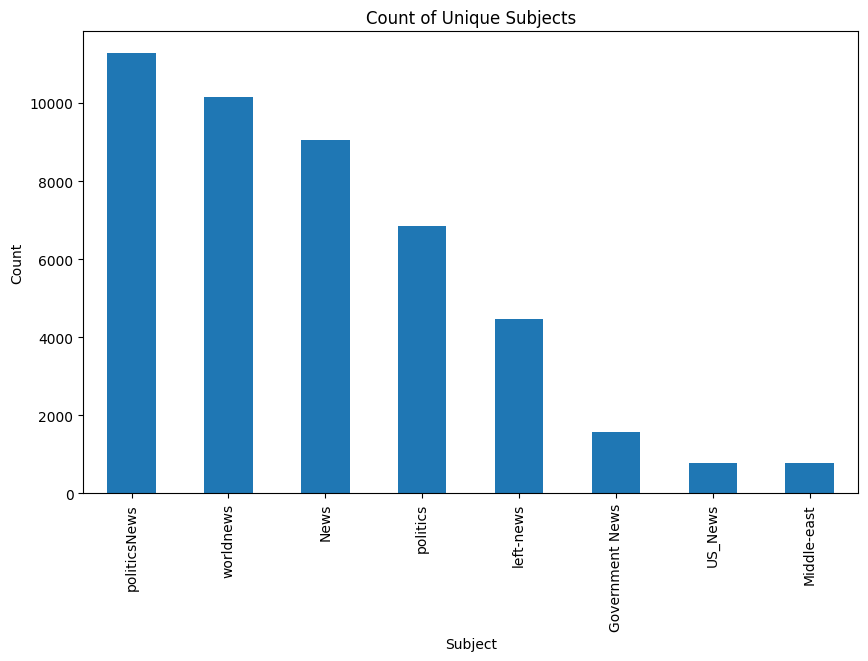

In [ ]:
# Check the data objects in the 'subject' column and count:
subject_counts = df['subject'].value_counts()

# Create a bar plot to visualize the counts
plt.figure(figsize=(10, 6))
subject_counts.plot(kind='bar')
plt.title('Count of Unique Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### The top three subjects with the highest frequency are "politicsNews," followed by "worldnews," and "News."

# Separate dataset into features (X) and targets (y)

In [18]:

X = df['text'].values
y = df['class'].values

print(len(X))
print(len(y))

38647
38647


# Vectorization

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix = count_vectorizer.transform(X)

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
print(tf_idf_matrix)

  (0, 120743)	0.03549864574911261
  (0, 120694)	0.09621559141493632
  (0, 120305)	0.04750813660726372
  (0, 120293)	0.20956753702982128
  (0, 120235)	0.06879966969066313
  (0, 119314)	0.02601354153467035
  (0, 119132)	0.021558520016874045
  (0, 119012)	0.018785674364923777
  (0, 118992)	0.028630637175675898
  (0, 118900)	0.032646155781119165
  (0, 118899)	0.021030134353813783
  (0, 118573)	0.16653052599166582
  (0, 118225)	0.022344467294062944
  (0, 118048)	0.020063830216632696
  (0, 117993)	0.029443995384391977
  (0, 117802)	0.012314032842963896
  (0, 117753)	0.025351285109068557
  (0, 117536)	0.012080411130075876
  (0, 117522)	0.02174695360088896
  (0, 117511)	0.07146565120322115
  (0, 117504)	0.05017095356850635
  (0, 117465)	0.07146565120322115
  (0, 116665)	0.03630888658144237
  (0, 116034)	0.026456671719776708
  (0, 115144)	0.05096720908833454
  :	:
  (38646, 21844)	0.05680838636136415
  (38646, 18162)	0.04544837238816979
  (38646, 18099)	0.06747468905402616
  (38646, 17807)	0.03

# Modeling

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the data into test data and train data 80/20

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, y, test_size=0.2, stratify=y, random_state=42)

# Multinomial Naive Bayes (NB)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# NB = MultinomialNB(alpha = 1.0)
# NB = MultinomialNB(alpha = 0.1)
NB = MultinomialNB(alpha = 2.0)
NB.fit(X_train, y_train)
Accuracy = NB.score(X_test, y_test)

# Training accuracy
train_accuracy = accuracy_score(y_train, NB.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, NB.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
classification_rep = classification_report(y_test, NB.predict(X_test))
print("Classification Report:\n", classification_rep)


Training Accuracy: 0.9360
Test Accuracy: 0.9265
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91      3491
           1       0.90      0.98      0.94      4239

    accuracy                           0.93      7730
   macro avg       0.93      0.92      0.92      7730
weighted avg       0.93      0.93      0.93      7730



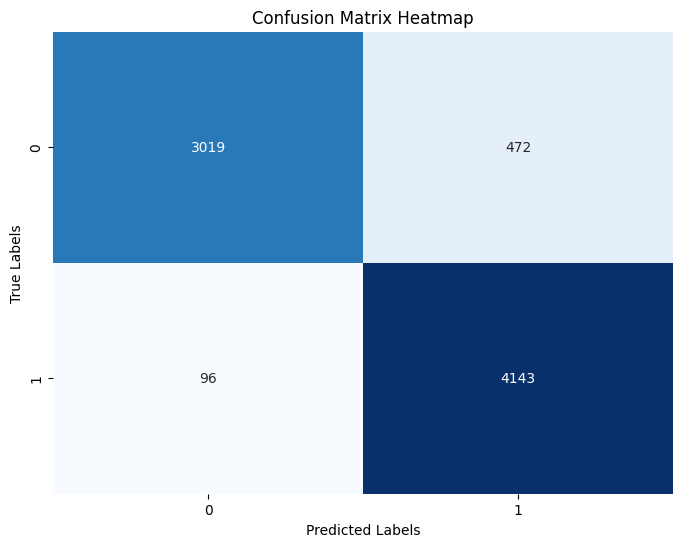

In [37]:
# Default - alpha = 2.0
# Assuming you have trained your classifier and made predictions
y_pred = NB.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

##############################################################################################

# Neural Network (MLP)

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), alpha = 0.1, max_iter=100)


history = mlp_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = mlp_model.predict(X_train)

# Make predictions on the test set
y_test_pred = mlp_model.predict(X_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate and print the accuracy, precision, recall, and F1-score on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Training Accuracy: 0.9999676553352524
Test Accuracy: 0.9913324708926261
Accuracy: 0.9913
Precision: 0.9913
Recall: 0.9913
F1-score: 0.9913


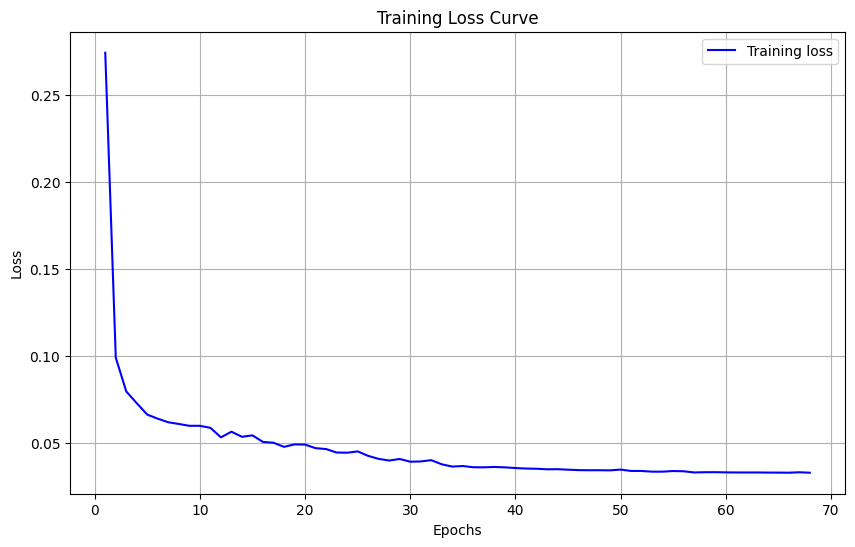

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#  MLPClassifier(hidden_layer_sizes=(100, 50), alpha = 0.1, max_iter=100)

# Extract the loss values
train_loss = history.loss_curve_
num_epochs = len(train_loss)

# Create a range of epochs for the x-axis
epochs = range(1, num_epochs + 1)

# Plot the loss curve for all epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

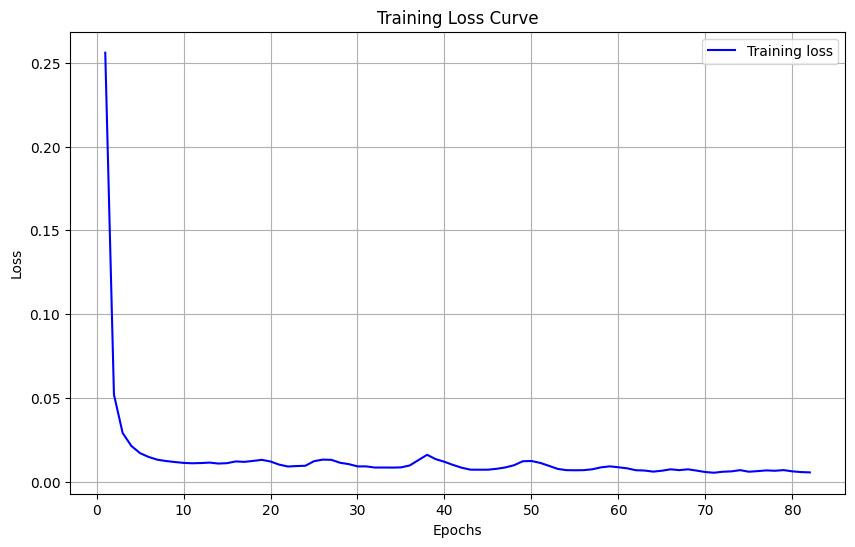

In [41]:

#  mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), alpha = 0.1, max_iter=100)

# Extract the loss values
train_loss = history.loss_curve_
num_epochs = len(train_loss)

# Create a range of epochs for the x-axis
epochs = range(1, num_epochs + 1)

# Plot the loss curve for all epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

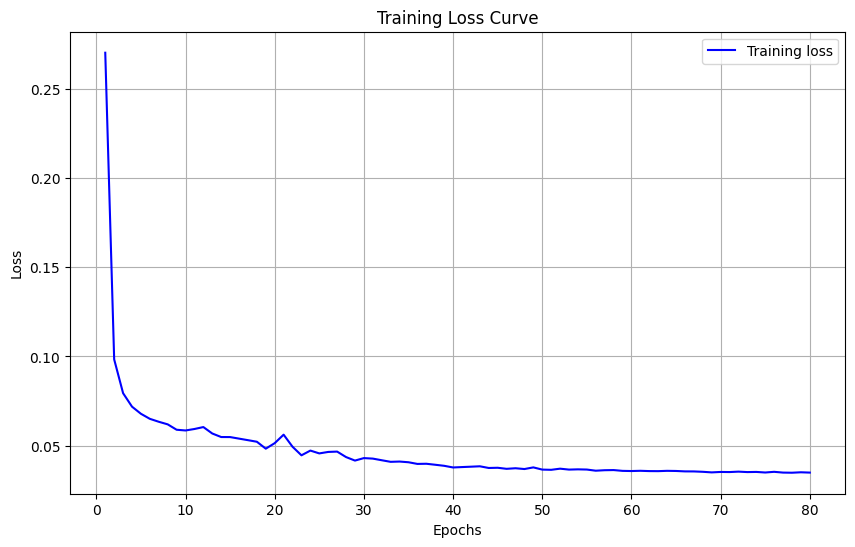

In [43]:
# mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), alpha = 0.1, max_iter=300)

# Extract the loss values
train_loss = history.loss_curve_
num_epochs = len(train_loss)

# Create a range of epochs for the x-axis
epochs = range(1, num_epochs + 1)

# Plot the loss curve for all epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#################################################################################################################################################################

# Support Vector Machine (SVM)

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Create an SVM model
svm_model = SVC(kernel='sigmoid', C=1.0, random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", class_report)


Training Accuracy: 0.9966038102015072
Test Accuracy: 0.9913324708926261

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3491
           1       0.99      1.00      0.99      4239

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



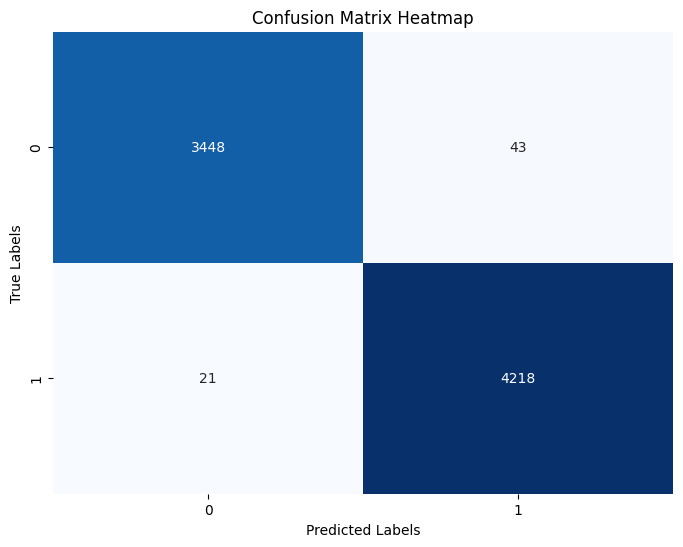

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# svm_model = SVC(kernel='poly', C=1.0, random_state=42)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

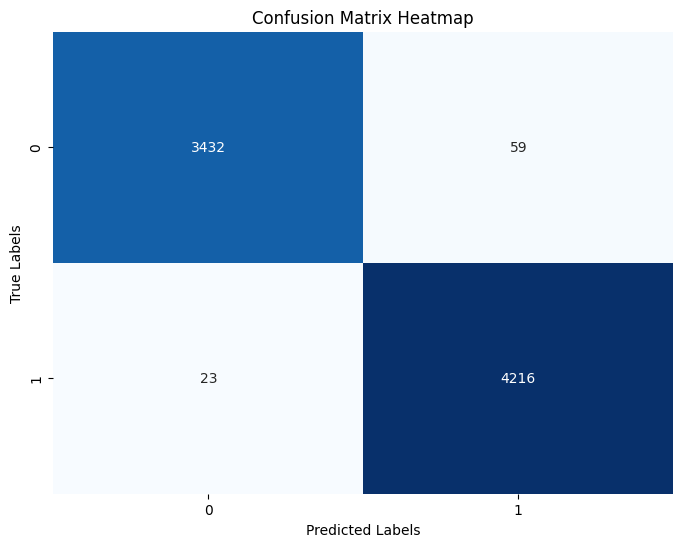

In [45]:
# svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

#######################################################################################################################

# Embedded and Padding

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df['text'].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the string labels to numeric values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Create a label encoder
label_encoder = LabelEncoder()

print(y_train_encoded)
print(y_test_encoded)


[1 1 1 ... 0 0 1]
[0 0 0 ... 1 1 0]


In [9]:
#! pip install keras-Preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

max_words = 800
max_sequence_length = 100

# Tokenization and sequence padding
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_sequence_length, padding='post', truncating='post')


In [10]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/Colab Notebooks/Lab11/glove.6B.50d.txt', tokenizer.word_index, embedding_dim)

# Checking the coverage
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / max_words)

89.8675


# MNB

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

NB = MultinomialNB(alpha = 0.1)
NB.fit(X_train, y_train)
Accuracy = NB.score(X_test, y_test)

# Training accuracy
train_accuracy = accuracy_score(y_train, NB.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.4f}")

# Test accuracy
test_accuracy = accuracy_score(y_test, NB.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
classification_rep = classification_report(y_test, NB.predict(X_test))
print("Classification Report:\n", classification_rep)


Training Accuracy: 0.5708
Test Accuracy: 0.5583
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.54      0.53      3491
           1       0.60      0.57      0.59      4239

    accuracy                           0.56      7730
   macro avg       0.56      0.56      0.56      7730
weighted avg       0.56      0.56      0.56      7730



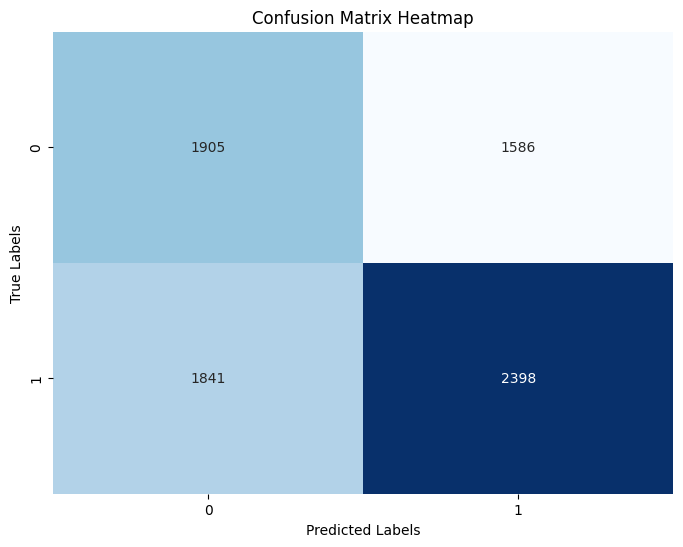

In [61]:
# alpha = 2.0

y_pred = NB.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

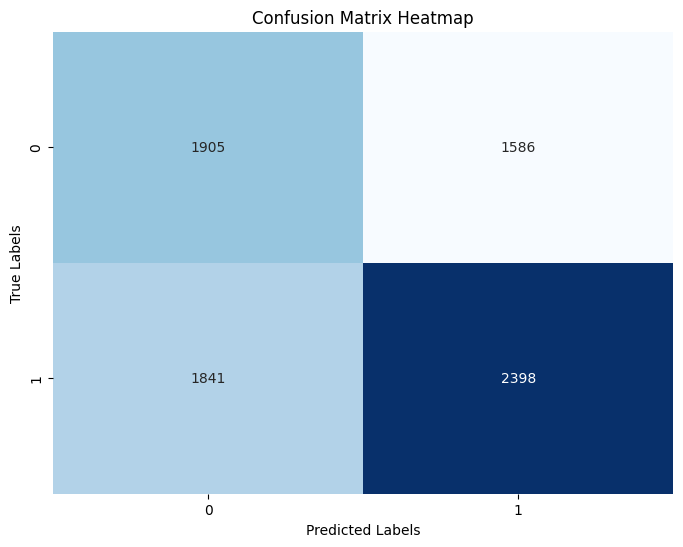

In [63]:
# Default - alpha = 1.0

y_pred = NB.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

###############################################################################################################

# MLP

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 20), alpha = 0.01, max_iter=100)


history = mlp_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = mlp_model.predict(X_train)

# Make predictions on the test set
y_test_pred = mlp_model.predict(X_test)

# Calculate and print the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate and print the accuracy, precision, recall, and F1-score on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Accuracy: 0.8656079179739302
Test Accuracy: 0.73130659767141
Accuracy: 0.7313
Precision: 0.7421
Recall: 0.7313
F1-score: 0.7316


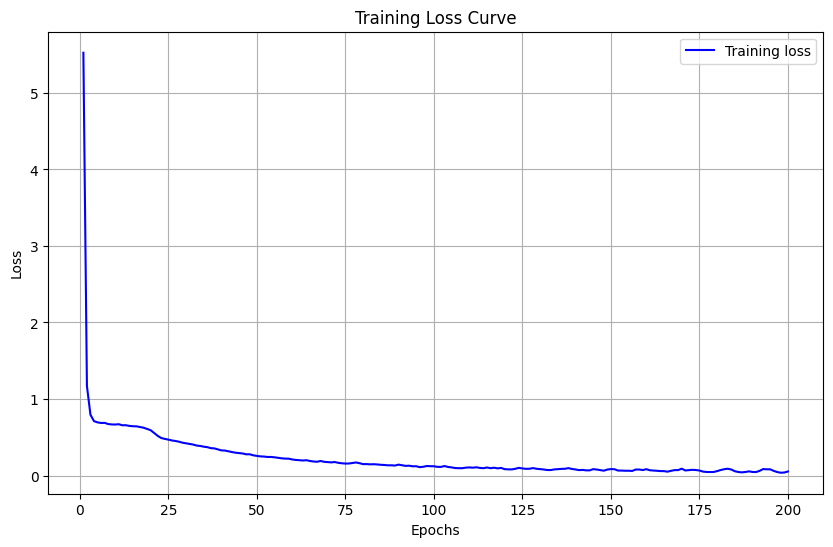

In [66]:
# mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), alpha = 0.001, max_iter=200)

# Extract the loss values
train_loss = history.loss_curve_
num_epochs = len(train_loss)

# Create a range of epochs for the x-axis
epochs = range(1, num_epochs + 1)

# Plot the loss curve for all epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

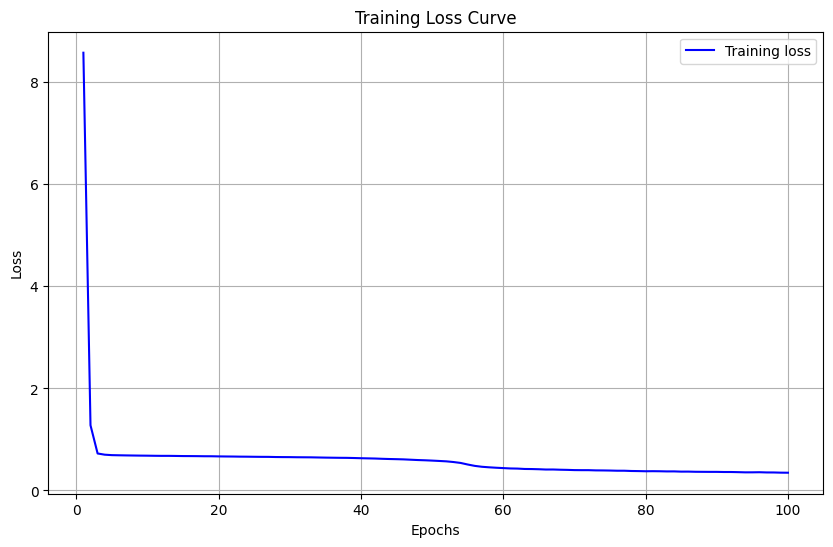

In [19]:
# mlp_model = MLPClassifier(hidden_layer_sizes=(50, 20), alpha = 0.01, max_iter=100)

# Extract the loss values
train_loss = history.loss_curve_
num_epochs = len(train_loss)

# Create a range of epochs for the x-axis
epochs = range(1, num_epochs + 1)

# Plot the loss curve for all epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

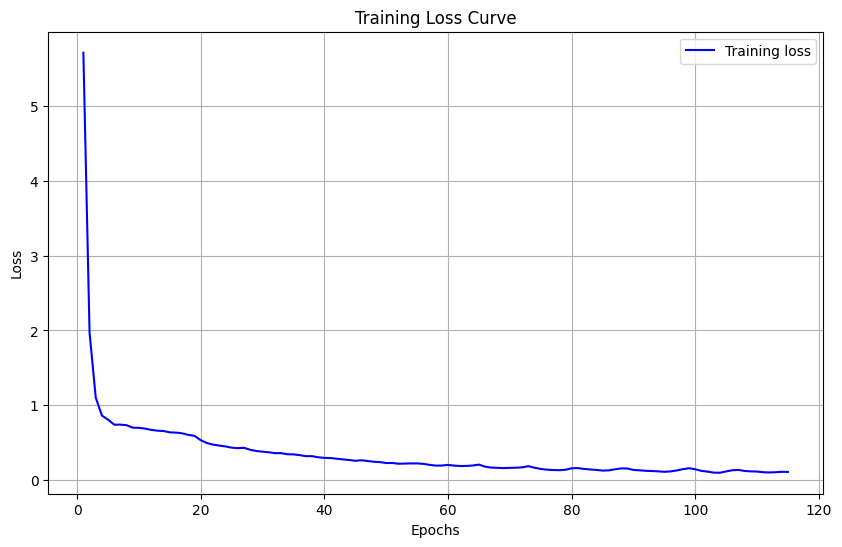

In [70]:
# mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), alpha = 0.01, max_iter=300)

# Extract the loss values
train_loss = history.loss_curve_
num_epochs = len(train_loss)

# Create a range of epochs for the x-axis
epochs = range(1, num_epochs + 1)

# Plot the loss curve for all epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#######################################################################################################

#SVM

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", class_report)


Training Accuracy: 0.8227835818481741
Test Accuracy: 0.605045278137128

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.44      0.50      3491
           1       0.62      0.74      0.67      4239

    accuracy                           0.61      7730
   macro avg       0.60      0.59      0.59      7730
weighted avg       0.60      0.61      0.59      7730



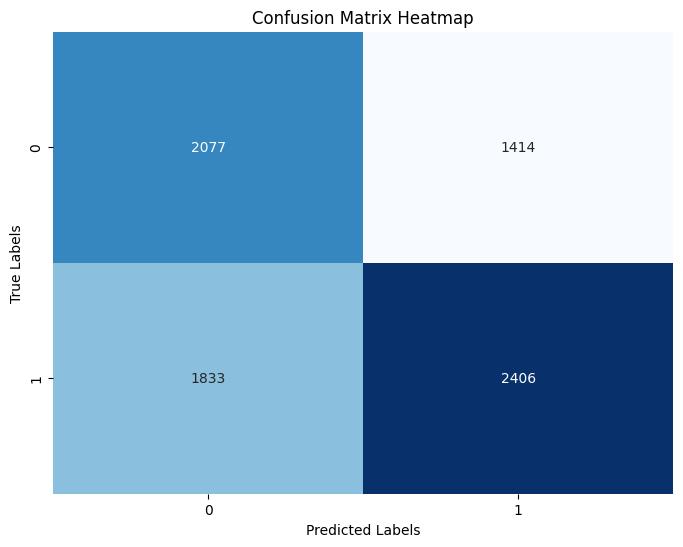

In [23]:
# svm_model = SVC(kernel='sigmoid', C=1.0, random_state=42)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

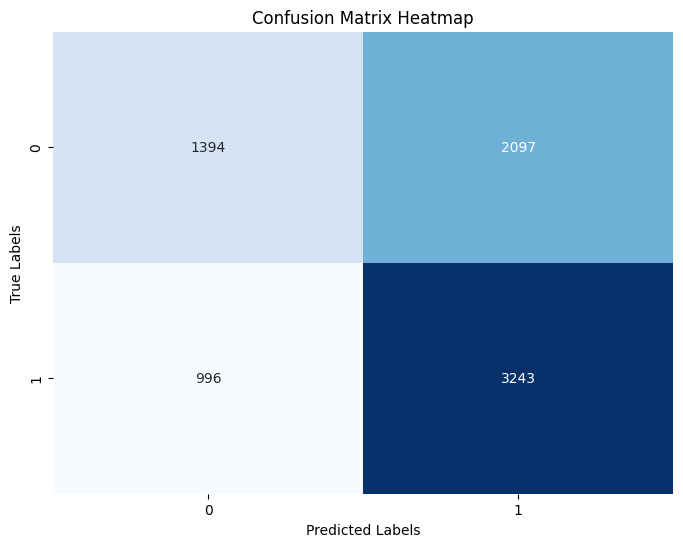

In [22]:
# svm_model = SVC(kernel='poly', C=1.0, random_state=42)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()